In [27]:
import numpy as np

# Q1

In [28]:
def element_wise_comparisons(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """
    greater_result = np. greater(array1, array2)
    greater_equal_result = np.greater_equal(array1, array2)
    less_result = np.less(array1, array2)
    less_equal_result = np.less_equal(array1, array2)

    return greater_result, greater_equal_result, less_result, less_equal_result

In [29]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparisons(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [30]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """
    if method == "element-wise":
      result = np.multiply(array1, array2)
    else:
      result = np.matmul(array1, array2)

    return result

In [31]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[2, 0], [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [32]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.

    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    if method == "row-wise":
        if p.shape[0] != q.shape[0]:
            raise ValueError("Incompatible shapes for row-wise addition. Number of rows must match.")
        result = p + q
    elif method == "column-wise":
        if p.shape[0] != q.shape[0]:
            raise ValueError("Incompatible shapes for column-wise addition. Number of columns must match.")
        result = p + q[:, np.newaxis]
    else:
        raise ValueError("Invalid method. Choose either 'row-wise' or 'column-wise'.")

    return result


In [33]:
# Example usage with different-shaped arrays
p = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
q = np.array([10, 20, 30])

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [34]:
# Initialize the random matrix
x = np.random.randint(1, 10, size=(4, 4))

print("Original Array:")
print(x)

# Do the normalization
# based on that for this kind of normalization we should decrease the min value of x from it and then divide to (max value of x - min value of it)
min_value = x.min()
max_value = x.max()
x = (x - min_value) / (max_value - min_value)

print("After normalization:")
print(x)

Original Array:
[[3 5 3 4]
 [8 1 7 6]
 [1 1 9 1]
 [9 6 4 8]]
After normalization:
[[0.25  0.5   0.25  0.375]
 [0.875 0.    0.75  0.625]
 [0.    0.    1.    0.   ]
 [1.    0.625 0.375 0.875]]


# Q5

0.0005548260008486608
average_daily_return: 0.0005548260008486608
std_dev_daily_return: 0.009455978850317194
0.009455978850317194




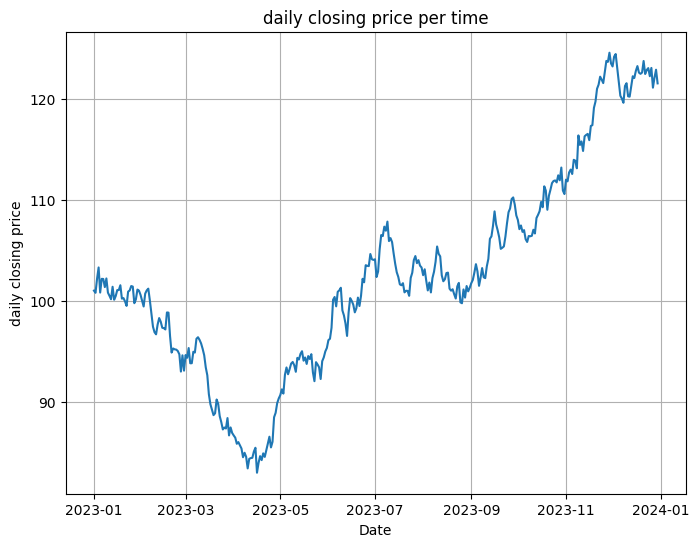

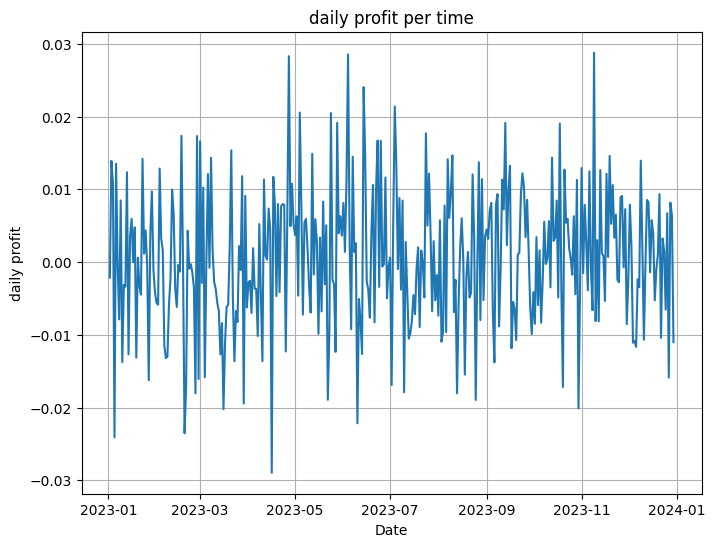



max_return_day: 2023-11-09 00:00:00 with return of 0.02878633838810639
min_return_day: 2023-04-16 00:00:00 with return of -0.028963574613605738


max_price_date: 2023-11-29 00:00:00 with price of 124.6180108
min_price_date: 2023-04-16 00:00:00 with price of 82.96821012


In [35]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.csv")
#.shift(1) = Closing Price rouz ghabl
data['daily profit'] = (data['Closing Price'] - data['Closing Price'].shift(1)) / data['Closing Price'].shift(1)

daily_returns = data['daily profit']
average_daily_return = daily_returns.mean()
print(average_daily_return)
print(f'average_daily_return: {average_daily_return}')

std_dev_daily_return = daily_returns.std()
print(f'std_dev_daily_return: {std_dev_daily_return}')
print(std_dev_daily_return)
print("\n")

data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(8, 6))
plt.plot(data['Date'], data['Closing Price'])
plt.xlabel('Date')
plt.ylabel('daily closing price')
plt.title('daily closing price per time')
plt.grid(True)
plt.show()
print("\n")

plt.figure(figsize=(8, 6))
plt.plot(data['Date'], data['daily profit'])
plt.xlabel('Date')
plt.ylabel('daily profit')
plt.title('daily profit per time')
plt.grid(True)
plt.show()
print("\n")

max_return_day = daily_returns.idxmax()
min_return_day = daily_returns.idxmin()
print(f'max_return_day: {data.at[max_return_day, "Date"]} with return of {daily_returns[max_return_day]}')
print(f'min_return_day: {data.at[min_return_day, "Date"]} with return of {daily_returns[min_return_day]}')
print("\n")

max_price_date = data.loc[data['Closing Price'].idxmax(), 'Date']
max_price_value = data['Closing Price'].max()
min_price_date = data.loc[data['Closing Price'].idxmin(), 'Date']
min_price_value = data['Closing Price'].min()
print(f'max_price_date: {max_price_date} with price of {max_price_value}')
print(f'min_price_date: {min_price_date} with price of {min_price_value}')
# You should write your code here and print or plot the required data asked in homework documentation

# Q6

In [36]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.zeros((1000, 1))
    for i in range(1000):
        outputs[i, 0] = np.sum(X[i, :] * w)
    return outputs

def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.dot(X, w)

    return outputs

In [37]:
import time

# generate random samples

X = np.random.rand(1000, 500)
w = np.random.rand(500, 1)

start_time = time.time()
outputs = for_loop_feed_forward(X, w)

print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)

start_time = time.time()
outputs = vectorized_feed_forward(X, w)

print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)

Time spent on calculating the outputs using for loops: 
0.23777079582214355
Time spent on calculating the outputs using vectorization: 
0.004640340805053711


# Q7

In [38]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """
    modified_arr = np.where(array > threshold, 1, 0)
    return modified_arr

In [39]:
input_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[0 0 0]
 [0 0 1]
 [1 1 1]]


# Q8

In [46]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        self.matrix = matrix

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """
        return self.matrix == second_matrix

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        result = Matrix([[False for i in range(len(self.matrix))] for j in range(len(self.matrix[0]))])
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                if (self.matrix[i][j] > second_matrix.matrix[i][j]):
                    result.matrix[i][j] = True
        return result.matrix
    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False otherwise.
        """
        #in order to define the subset of a matrix, we prepare all its subsets and then compare them with our second one. if one of them is equal to it, then we return True!
        subsets = []
        subset = [[0 for _ in range(len(second_matrix.matrix[0]))] for _ in range(len(second_matrix.matrix))]
        for i in range(len(self.matrix) - len(second_matrix.matrix) + 1):
            for j in range(len(self.matrix[0]) - len(second_matrix.matrix[0]) + 1):
                subset = [row[j : j + len(second_matrix.matrix[0])] for row in self.matrix[i : i + len(second_matrix.matrix)]]
                subsets.append(subset)

        for subset in subsets: #checking the subsets
            if second_matrix.is_equal(Matrix(subset)):
                return True
        return False
    def dot_product(self, second_matrix):
        """
        Calculate the dot product between this Matrix object and another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for the dot product.

        Returns:
        - Matrix: The result of the dot product as a numpy.ndarray.
        """
        result = [[0 for _ in range(len(self.matrix[0]))] for _ in range(len(self.matrix))]
        for i in range(len(self.matrix)):
          for j in range(len(second_matrix.matrix[0])):
            for k in range(len(self.matrix[0])):
              result[i][j] += self.matrix[i][k] * second_matrix.matrix[k][j]

        return result

In [53]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])

# test equality of matrices here and show the result #
is_equal = matrix1.is_equal(matrix2)
print(is_equal)


False


In [54]:
matrix3 = Matrix([[0, 0, 0], [10, 20, 30], [-1, 8, 10]])

# test proportion of matrices here and show the result #
comparison_result = matrix3.is_higher_elementwise(matrix2)
print(comparison_result)



[[False, False, False], [True, True, True], [False, False, True]]


In [57]:
matrix4 = Matrix([[5, 6], [8, 9]])
matrix5 = Matrix([[1, 2], [4, 5]])
matrix6 = Matrix([[1, 2], [3, 4]])


# test subset of matrices here and show the result #
print(matrix1.is_subset(matrix6))



False


In [44]:
matrix7 = Matrix([[3, 1], [2, 4], [-1, 5]])
matrix8 = Matrix([[3, 1], [2, 4]])

# test product of matrices here and show the result #
result_multiply = matrix7.dot_product(matrix8)
print(result_multiply)



[[11, 7], [14, 18], [7, 19]]
